## Gmartket 베스트 상품 이미지 크롤링

### Gmartket 베스트 상품 이미지 크롤링
* 패션 의류 탑 5 상품 이미지

In [1]:
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup

crawl_num = 5   #크롤 갯수

#타깃이 되는 URL
best_url = 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G01'

#HTML 가져오기
res = requests.get(best_url)

#HTML 파싱하여 객체에 담기
soup = BeautifulSoup(res.content, 'html.parser')

#태그안의 정보 빼기
products = soup.select('div.best-list > ul > li') 

In [3]:
products[0].select_one('a.itemname').get_text()

'너의지금 20%쿠폰 신상니트 가디건/롱/세트/가을신상/크롭/박스/루즈핏/긴팔'

In [4]:
img_tag = products[0].select_one('img.lazy')
img_tag

<img alt="너의지금 20%쿠폰 신상니트 가디건/롱/세트/가을신상/크롭/박스/루즈핏/긴팔" class="lazy" data-original="//gdimg.gmarket.co.kr/2563265875/still/300?ver=2022091514" height="210" src="//image.gmarket.co.kr/challenge/neo_image/no_image.gif" width="210"/>

In [5]:
'https:'+img_tag['data-original']

'https://gdimg.gmarket.co.kr/2563265875/still/300?ver=2022091514'

In [6]:
'https:'+img_tag['src']

'https://image.gmarket.co.kr/challenge/neo_image/no_image.gif'

In [7]:
img_url = 'https:'+ img_tag['data-original']
img_url

'https://gdimg.gmarket.co.kr/2563265875/still/300?ver=2022091514'

In [8]:
img_url = 'https:'+ img_tag['src']
img_url

'https://image.gmarket.co.kr/challenge/neo_image/no_image.gif'

In [1]:
## 이미지 다운로드
from urllib.request import urlopen
imgUrl = 'https://gdimg.gmarket.co.kr/189842449/still/300?ver=2022090322'

index = 0
with urlopen(imgUrl) as f:
    with open('./image/crawl/img'+ str(index +1) + '.jpg','wb') as h: # w - write b - binary
        img = f.read()
        h.write(img)

## 종합코드

* 베스트 5개 이미지만 저장할 것!

In [3]:
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup

crawl_num = 5   #크롤 갯수

#타깃이 되는 URL
best_url = 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G01'

#HTML 가져오기
res = requests.get(best_url)

#HTML 파싱하여 객체에 담기
soup = BeautifulSoup(res.content, 'html.parser')

#태그안의 정보 빼기
products = soup.select('div.best-list > ul > li')

for index, product in enumerate(products):
  #print(index)
  
  #상품이름
  pname = product.select_one('a.itemname').get_text()
  pname = pname.replace('/','')
  #print(pname)

  #이미지 태그
  img_tag = products[0].select_one('img.lazy')
  #이미지 URL링크 만들기
  img_url = 'https:'+ img_tag['data-original']

  #이미지 저장
  with urlopen(img_url) as f:
    with open('./image/crawl/img'+ str(index +1) +'_'+pname+'.jpg','wb') as h: # w - write b - binary
        img = f.read()
        h.write(img)

  #5개만 저장하고 for문 빠져나오기      
  if index == crawl_num-1:
    break      

print('크롤링 끝')

크롤링 끝


### 파일이름에 상품명이 같이 나오도록 바꾸기

* 예) img1.jpg -> img1_겨울 따뜻한 후리스조끼플리스자켓패딩기모바지.jpg

In [22]:
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup

crawl_num = 5   #크롤 갯수

#타깃이 되는 URL
best_url = 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G01'

#HTML 가져오기
res = requests.get(best_url)

#HTML 파싱하여 객체에 담기
soup = BeautifulSoup(res.content, 'html.parser')

#태그안의 정보 빼기
products = soup.select('div.best-list > ul > li')

for index, product in enumerate(products): #자동화
  #print(index)
  
  #상품이름 가져오기
  pname = product.select_one('a.itemname').get_text()
  pname = pname.replace('/','')

  #이미지 태그
  img_tag = products[0].select_one('img.lazy')
  #이미지 URL링크 만들기
  img_url = 'https:'+ img_tag['data-original']

  #이미지 저장
  with urlopen(img_url) as f:
    with open('./image/crawl/img'+ str(index +1) +'_'+pname+'.jpg','wb') as h: # w - write b - binary
        img = f.read()
        h.write(img)

  #(반복문 제어)5개만 저장하고 for문 빠져나오기      
  if index == crawl_num-1:
    break      

print('크롤링 끝')

크롤링 끝


### 카테고리별 베스트 상품 크롤링 자동화

* 패션의류, 신발/잡화, 화장품/헤어, 유아동/출산 .........
* 원하는 만큼 상품 크롤링

#### 자동으로 URL 만들기

* http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G01
* http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G02
* http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G03
* http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G04

> URL을 위의 순서처럼 순서대로 만들려면 어떻게 해야할까?

In [23]:
url=[]
for n in range(1,5):
    url.append(f'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G{n:02d}')
url

['http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G01',
 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G02',
 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G03',
 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G04']

#### 자동으로 4개의 카테고리 베스트 상품을 크롤링 하세요

In [46]:
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup
crawl_num = 5   #크롤 갯수

#타깃이 되는 URL
best_url = 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G{:02d}'

for i in range(1,5):
  
    #태그 안의 정보 빼기
    url = best_url.format(i)
    res = requests.get(url)

    #HTML 파싱하여 객체에 담기
    soup = BeautifulSoup(res.content, 'html.parser')
    #태그안의 정보 빼기
    products = soup.select('div.best-list > ul > li')
    # 상품명
    for index, product in enumerate(products):
        #이미지 태그
        img_tag = product.select_one('img.lazy')
        # 이미지 URL 링크 만들기
        img_url = 'https:'+ img_tag['data-original']
        # 이미지 저장
        pname = product.select_one('a.itemname').get_text()
        pname = pname.replace('/','') # 클린징
        with urlopen(img_url) as f:
            with open(f'./image/crawl/category_num{i}_{index+1}위_{pname}' + '.jpg','wb') as h: # w - write b - binary
                img = f.read()
                h.write(img)
         # 5개만 저장하고 for문 빠져나오기
        if index == crawl_num -1 : # index는 0번부터 시작하니까 -1
            break
print('크롤링 끝-')

크롤링 끝-


### 파일 이름이 카테고리별로 정리 되려면 어떻게 해야할까요?
>예) <br>
>img1_겨울 따뜻한 후리스조끼플리스자켓패딩기모바지.jpg <br>
>img1_[달바]화이트 트러플 미스트 세럼 180ml+180ml.jpg <br>
>크롤링한 파일이 섞여있어, 카테고리별 베스트 상품을 파악할 수 없어요. <br>

## Pillow(PIL) 모듈 체험

* 파이썬 이미징 라이브러리로서 여러 이미지 파일 포맷을 지원
* 이미지 내부 데이타를 엑세스할 수 있게 하며, 다양한 이미지 처리 기능을 제공

https://pillow.readthedocs.io/en/stable/reference/index.html

http://pythonstudy.xyz/python/article/406-%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EC%B2%98%EB%A6%AC-Pillow


In [7]:
!pip install Pillow

### 이미지 읽고 쓰기

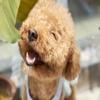

In [11]:
from PIL import Image
# 이미지 열기
tmp = Image.open('./image/dog.jpg')
tmp 
# # 이미지 크기 출력
# print(tmp.size)
# tmp.close()

In [12]:
from PIL import Image
# 이미지 열기
fileName='dog'
tmp = Image.open('./image/' + fileName + '.jpg')
 
# 이미지 크기 출력
print(tmp.size)
tmp.close()

(100, 100)


### 이미지 사이즈 조절

In [13]:
fileName='dog'
tmp=Image.open('./image/' + fileName + '.jpg')

# 200x200으로 조절
tmpResize=tmp.resize((100,100))
tmpResize.save('./image/' + fileName + '.jpg')

print('---end ---')
tmp.close()

---end ---


In [14]:
fileName='dog'
tmp=Image.open('./image/' + fileName + '.jpg')

size=300
tmpResize=tmp.resize((size,size))
tmpResize.save('./image/' + str(size) + fileName + '.jpg')
print('---end ---')
tmp.close()

---end ---


### 이미지에 로고 합성
 https://creativeworks.tistory.com/entry/PYTHON-3-Tutorials-41-Combine-Images-Together-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EB%B3%91%ED%95%A9%ED%95%98%EA%B8%B0-like-watermark%EC%9B%8C%ED%84%B0%EB%A7%88%ED%81%AC?category=620431

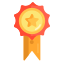

In [42]:
from PIL import Image

logo=Image.open('./image/top.png')
logo
#print(logo.size)

In [43]:
#area=(0,0,64,64)
p=Image.open('C:\Dev_work\image\crawl\category_num1_1위_너의지금 20%쿠폰 신상니트 가디건롱세트가을신상크롭박스루즈핏긴팔.jpg')

area=(0,0,logo.width,logo.height)

p.paste(logo,area,logo) #png 파일 배경 투명하게 붙이는 방법


p.save('C:\Dev_work\image\crawl\category_num1_1위_[logo]_너의지금 20%쿠폰 신상니트 가디건롱세트가을신상크롭박스루즈핏긴팔.jpg')
p.close()
logo.close()

## 디렉토리안 파일리스트 가져오기

In [44]:
import os
path_dir='./image/crawl'
fileList=os.listdir(path_dir)
fileList

['01_너의지금 20%쿠폰 신상니트 가디건,롱,세트,가을신상,크롭,박스,루즈핏,긴팔_1.jpg',
 '04_(할인특가) 인북 - 브레인 병풍차트 (12가지 주제) ',
 'category_num1_1위_[logo]_너의지금 20%쿠폰 신상니트 가디건롱세트가을신상크롭박스루즈핏긴팔.jpg',
 'category_num1_1위_너의지금 20%쿠폰 신상니트 가디건롱세트가을신상크롭박스루즈핏긴팔.jpg',
 'category_num1_2위_모노시크가을신상 티셔츠맨투맨후드니트블라우스셔츠남방가디건세트팬츠스커트데일리룩.jpg',
 'category_num1_3위_패션라인 가을신상 원피스니트맨투맨셔츠팬츠청바지자켓데님세트상품.jpg',
 'category_num1_4위_제이프랑 가을신상 티셔츠팬츠긴팔셋업.jpg',
 'category_num1_5위_쇼인더룸 가을신상할인 티셔츠세트팬츠빅사이즈.jpg',
 'category_num1_너의지금 20%쿠폰 신상니트 가디건롱세트가을신상크롭박스루즈핏긴팔.jpg',
 'category_num2_1위_[에스콰이아]30% 에스콰이아 가을준비 FW 가방 (숄더백토트미니백외).jpg',
 'category_num2_2위_[투투삭스]균일가 착용감 좋은 양말발목중목패션학생.jpg',
 'category_num2_3위_보가 가을신상 슬링백블로퍼펌프스스니커즈.jpg',
 'category_num2_4위_[디즈니]슈라모드디즈니 외 FW 1+1단품 거실화 털슬리퍼.jpg',
 'category_num2_5위_가을 신상 은침귀걸이 우영우 고래귀걸이 원터치 링 스터드.jpg',
 'category_num3_1위_[이니스프리](50%+10%) 전품목 빅세일+클렌징폼 선크림 핸드크림 반값.jpg',
 'category_num3_2위_[맥퀸뉴욕]UV쉴드 자외선차단 선패치 골프패치 선크림 외 아이라이너아이브로우멀티밤~75%.jpg',
 'category_num3_3위_[우르오스][우르오스] 스킨워시 500ml x 2개 (914  스킨로션 15ml + 스킨밀크 15ml 

## 카테고리별 1등 파일에만 1등 로고합성하기

* 디렉토리에 있는 파일리스트 파악하기
* 파일이름(문자열)에서 내가 찾고싶은 문자를 포함한 파일 찾기
* 로고 붙이기(검증된 내용)과 코드 조합하기

In [45]:
from PIL import Image
import os
path_dir='./image/crawl'
fileList=os.listdir(path_dir)
fileList
logo=Image.open('./image/top.png')

for file in fileList:
    if file.find('1위') != -1: # 파일명에 1위가 있다면
        # print(file)

        p=Image.open(f'./image/crawl/{file}')
        print(p)
        area=(0,0,logo.width,logo.height)
        p.paste(logo,area,logo)

        p.save(f'./image/crawl/[logo]{file}')
        p.close()
        
   
logo.close()

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x300 at 0x1920984AD60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x300 at 0x1920984A970>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x300 at 0x1920984A8E0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x300 at 0x1920984A6A0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x300 at 0x1920984A970>
